## Data Analysis and Visualization for NBA Rookies Data

* Contributors
    * Vijay Arora 

In [1]:
#import for Data Analysis
import numpy as np
import statistics as s
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
plt.style.use('seaborn-dark')

### Data visualization and exploration

Below program will load the given data set into Pandas Dataframe. 

Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them

In [2]:
nba_df = pd.read_csv("nba_logreg.csv")
nba_df.head(2)

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,NaN,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35.0,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0


In [3]:
## Validating the column name, data types and null values.
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1331 non-null   float64
 2   MIN          1336 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1328 non-null   float64
 13  OREB         1336 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1337 non-null   float64
 17  STL          1337 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

Class imbalance with appropriate visualization method.

In [4]:
nba_df["TARGET_5Yrs"].value_counts()

1    831
0    509
Name: TARGET_5Yrs, dtype: int64

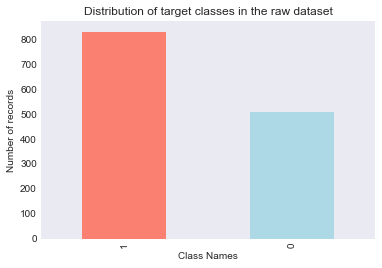

In [5]:
plt.figure(figsize=(6,4))
nba_df["TARGET_5Yrs"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.xlabel('Class Names')
plt.ylabel('Number of records')
plt.title('Distribution of target classes in the raw dataset')
plt.show()

**From the above visualization we can see that class is imbalanced as the number of records for rookies who played >=5 years are 831 and the ones
who played <5 years are 509 although there are a lot of different techniques for handeling class imbalance like collecting more data, over/under sampling and SMOTE - we thought 
of using the class_weight option to balance the imbalanced class and fit a better model.**

#### Visualizations for data insights

Visualizing players with highest points scored

In [6]:
high_scorers = nba_df[['Name','PTS']].groupby('Name').sum().sort_values('PTS', ascending = False).head(20)

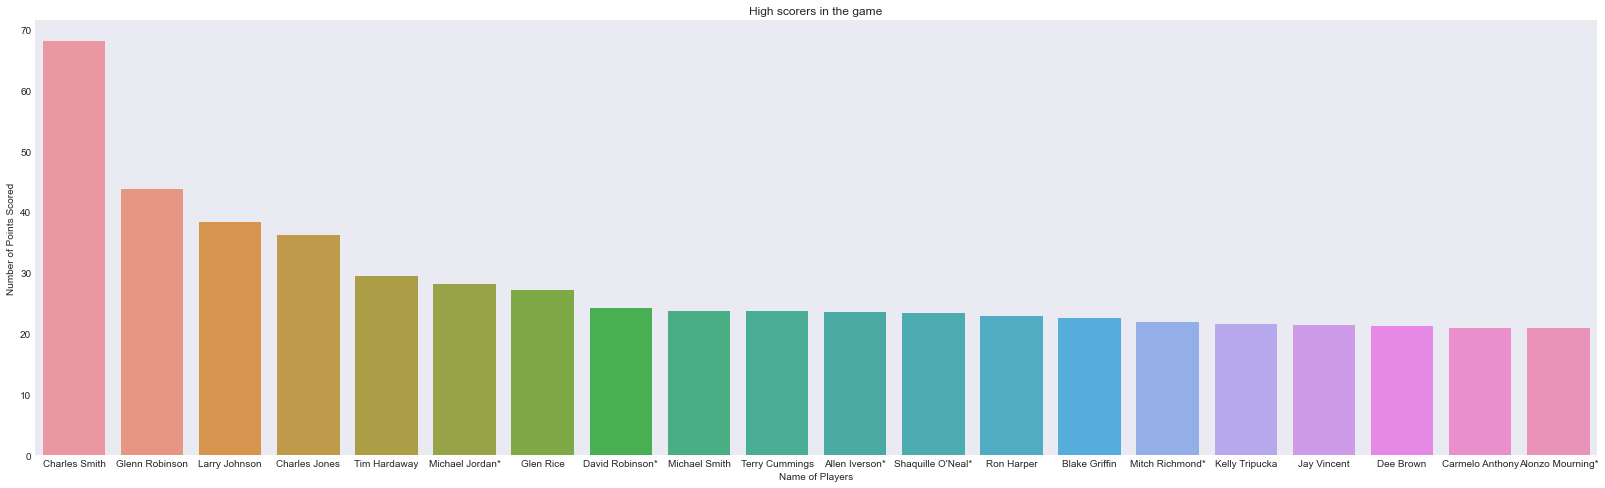

In [8]:
plt.figure(figsize=(28,8))
plt.xlabel('Name of Players')
plt.ylabel('Number of Points Scored')
plt.title('High scorers in the game')
x = high_scorers.index.tolist()
y = high_scorers["PTS"].tolist()
sns.barplot(x,y)
plt.show()
warnings.filterwarnings('ignore')

Visualizing the spread between the points and the games played

In [9]:
gamesPlayed_pts = nba_df[['GP','PTS','TARGET_5Yrs']]

In [10]:
# X = first two columns
X = gamesPlayed_pts.iloc[:, :-1]

# y = target values, last column
Y = gamesPlayed_pts.iloc[:, -1]

# filter out the players that played more than 5 years
_5yearsormore = gamesPlayed_pts.loc[Y == 1]

# filter out the players that played less than 5 years
lessthan5years = gamesPlayed_pts.loc[Y == 0]

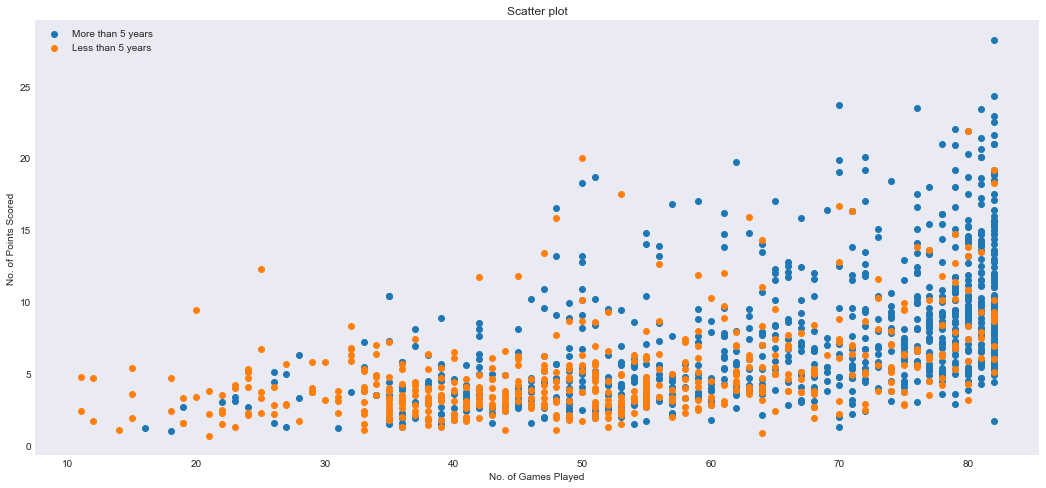

In [11]:
plt.figure(figsize=(18,8))
plt.scatter(_5yearsormore.iloc[:, 0], _5yearsormore.iloc[:, 1], label='More than 5 years')
plt.scatter(lessthan5years.iloc[:, 0], lessthan5years.iloc[:, 1],  label='Less than 5 years')
plt.legend()
plt.title('Scatter plot')
plt.xlabel('No. of Games Played')
plt.ylabel('No. of Points Scored')
plt.show()

#### Visualizing Correlation Matrix 

The correlation matrix will affect the feature selection as it gives an idea of how the features are co-related with each other and
with the target and with the help of that feature selection can be done effectively.

In [13]:
df_wo_name = nba_df.drop(["Name"], axis=1)

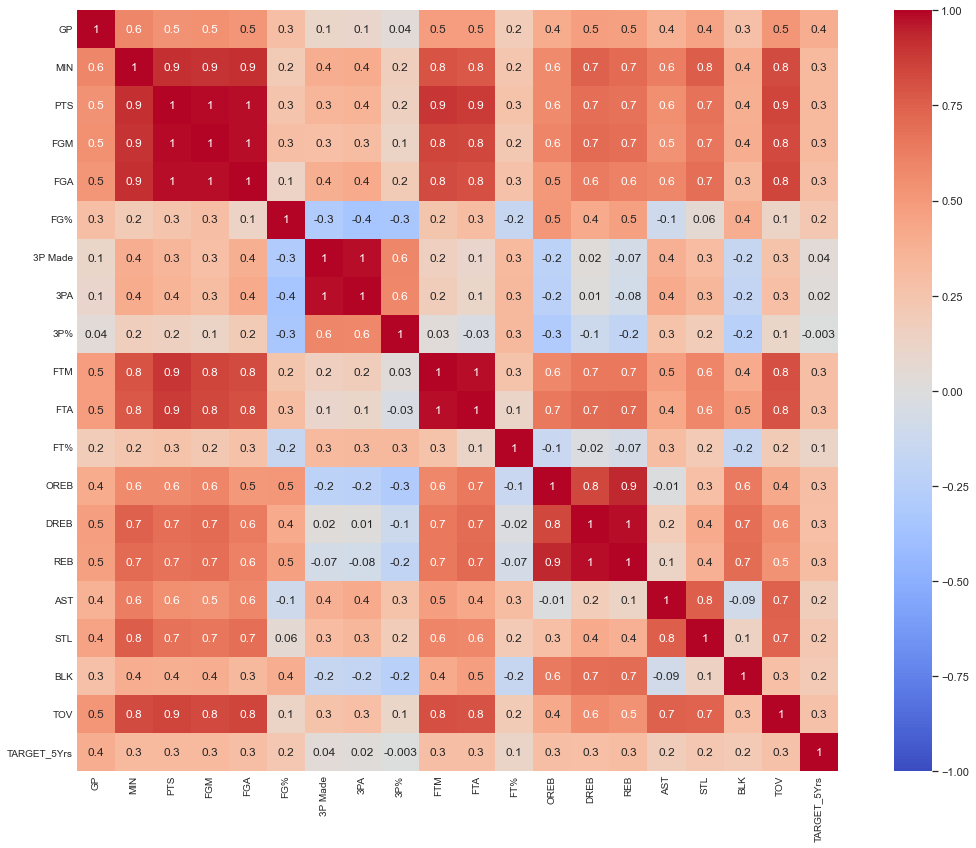

In [14]:
corr = df_wo_name.corr()
fig, ax = plt.subplots(figsize=(20, 14))
sns.set_theme(style = 'white') 
ax = sns.heatmap(corr,
            vmin = -1,
            vmax=1, 
            center=0,
            square=True, 
            annot = True,
            fmt = '.1g',
            cmap = 'coolwarm'
           )

## Data pre-processing

Removing the unwanted features i.e. Name - which doesn't impact the feature set based on the correlation analysis done above.

In [15]:
#dropping name
df_no_name = nba_df.drop(["Name"], axis=1)
df_no_name.head(2)

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,NaN,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,35.0,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0


**Checking for null values in the columns.**

In [16]:
# checking for nulls
df_wo_name.isnull().any()

GP              True
MIN             True
PTS            False
FGM            False
FGA            False
FG%            False
3P Made        False
3PA            False
3P%             True
FTM            False
FTA            False
FT%             True
OREB            True
DREB           False
REB            False
AST             True
STL             True
BLK            False
TOV            False
TARGET_5Yrs    False
dtype: bool

** Checking the number of null values in each columns**

In [17]:
df_wo_name.isnull().sum()

GP              9
MIN             4
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%            12
OREB            4
DREB            0
REB             0
AST             3
STL             3
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

By looking at the correlation of the data we observed that 3P% has 11 null values and FT% has 12 null values but by looking at the correlation matrix 
we observed that these are very lightly related with the other features as well as the target therefore, we decided to drop these features from our
dataset

In [18]:
df_wo_name = df_wo_name.drop("3P%", axis=1)

In [19]:
df_wo_name = df_wo_name.drop("FT%",axis=1)

In [20]:
df_wo_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GP           1331 non-null   float64
 1   MIN          1336 non-null   float64
 2   PTS          1340 non-null   float64
 3   FGM          1340 non-null   float64
 4   FGA          1340 non-null   float64
 5   FG%          1340 non-null   float64
 6   3P Made      1340 non-null   float64
 7   3PA          1340 non-null   float64
 8   FTM          1340 non-null   float64
 9   FTA          1340 non-null   float64
 10  OREB         1336 non-null   float64
 11  DREB         1340 non-null   float64
 12  REB          1340 non-null   float64
 13  AST          1337 non-null   float64
 14  STL          1337 non-null   float64
 15  BLK          1340 non-null   float64
 16  TOV          1340 non-null   float64
 17  TARGET_5Yrs  1340 non-null   int64  
dtypes: float64(17), int64(1)
memory usage: 188.6 KB


#### For GP, MIN, AST, OREB and STL - we decided to fill the null values with either mean or median

<AxesSubplot:xlabel='TARGET_5Yrs', ylabel='STL'>

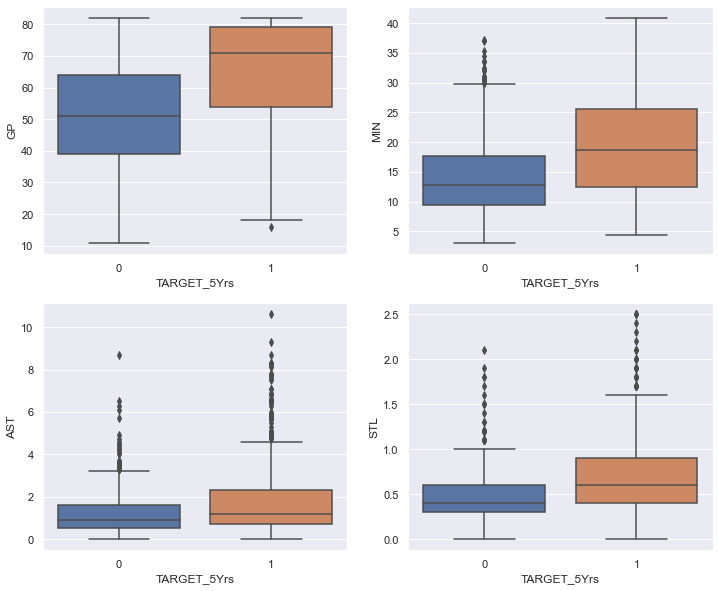

In [21]:
data = df_wo_name[['GP','MIN','AST','STL','TARGET_5Yrs']]
sns.set()
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(12, 10)
sns.boxplot(data=data, x='TARGET_5Yrs', y='GP', ax=axes[0,0])
sns.boxplot(data=data, x='TARGET_5Yrs', y='MIN', ax=axes[0,1])
sns.boxplot(data=data, x='TARGET_5Yrs', y='AST', ax=axes[1,0])
sns.boxplot(data=data, x='TARGET_5Yrs', y='STL', ax=axes[1,1])

Based on the boxplot above, we can conclude that the columns with lesser number of outliers are imputed with mean , and the colums which have greater numner of outlier are imputed by median

#### Checking the data and its skewness for further analysis.

Text(0.5, 0, 'Offensive Rebounds')

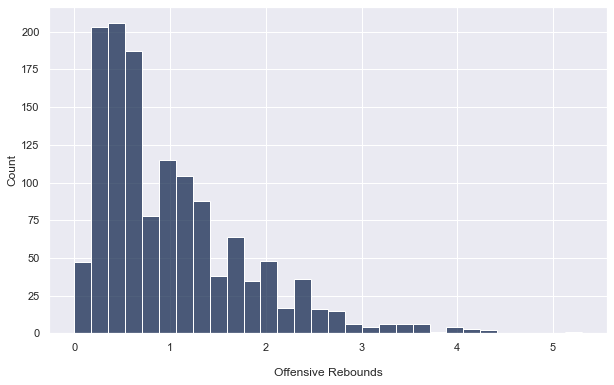

In [22]:
fig, ax = plt.subplots(figsize = (10,6))
sns.histplot(
    df_wo_name['OREB'],
    kde = False,
    color = '#14294F'
)
ax.set_xlabel('Offensive Rebounds', labelpad = 15)

Text(0.5, 0, 'Assists')

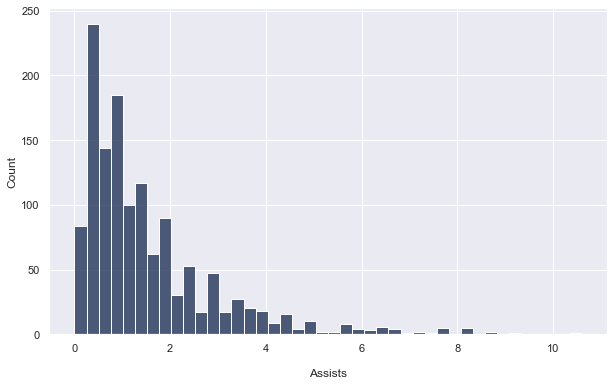

In [23]:
fig, ax = plt.subplots(figsize = (10,6))
sns.histplot(
    df_wo_name['AST'],
    kde = False,
    color = '#14294F'
)
ax.set_xlabel('Assists', labelpad = 15)

Text(0.5, 0, 'Steals')

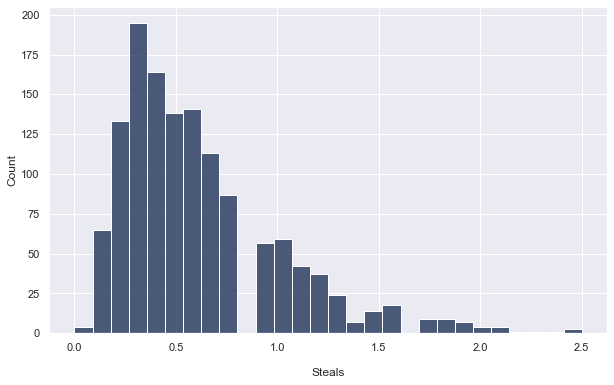

In [24]:
fig, ax = plt.subplots(figsize = (10,6))
sns.histplot(
    df_wo_name['STL'],
    kde = False,
    color = '#14294F'
)
ax.set_xlabel('Steals', labelpad = 15)

Text(0.5, 0, 'Minutes Played')

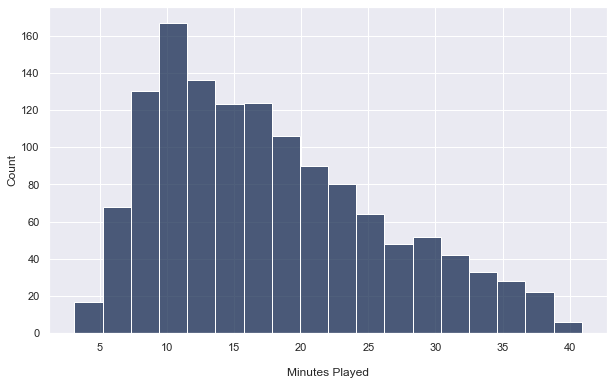

In [25]:
fig, ax = plt.subplots(figsize = (10,6))
sns.histplot(
    df_wo_name['MIN'],
    kde = False,
    color = '#14294F'
)
ax.set_xlabel('Minutes Played', labelpad = 15)

From the boxplots and the above distribution we can observe that the distribution for AST AND STL isn't symmetrical, hence,using Median to replace NA values would make more sense. However the median also differs for both the classes, hence, we'll be calculating and applying the median class-wise. 

For MIN the negative class includes some outliers, hence, using median would be better to fill the NA values.

For GP we can still use the mean to replace the NA values.

For OREB we can apply the median based on its data distribution to fill the NA values efficiently.

In [26]:
#filled GP with mean values
mean_val = df_wo_name["GP"].mean()
df_wo_name["GP"].fillna(mean_val, inplace=True)

In [27]:
#filled AST AND STL with median
median_ast = df_wo_name["AST"].median()
df_wo_name["AST"].fillna(median_ast, inplace=True)
median_stl = df_wo_name["STL"].median()
df_wo_name["STL"].fillna(median_stl, inplace=True)

In [28]:
#filling the MIN with median
median_min = df_wo_name["MIN"].median()
df_wo_name["MIN"].fillna(median_min, inplace=True)

In [29]:
#filling the OREB with median
median_oreb = df_wo_name["OREB"].median()
df_wo_name["OREB"].fillna(median_oreb, inplace=True)

Checking the null values after imputation 

In [30]:
# checking for nulls
df_wo_name.isnull().any()

GP             False
MIN            False
PTS            False
FGM            False
FGA            False
FG%            False
3P Made        False
3PA            False
FTM            False
FTA            False
OREB           False
DREB           False
REB            False
AST            False
STL            False
BLK            False
TOV            False
TARGET_5Yrs    False
dtype: bool